# Galpro Demo

In this notebook, we will be demonstrating how to use Galpro and familiarising the user to all of its functionalities by training a Random Forest model to predict redshift and stellar mass.

In [1]:
import numpy as np
import galpro as gp

### Loading data

We have created an example dataset from the COSMOS2015 catalogue. We use SUBARU $V,r,i+,z++$ photometry, redshifts, and stellar masses of galaxies from the catalogue. The dataset is composed of the same training and testing galaxies as used in the analysis in our paper ([A machine learning approach to galaxy properties: joint redshift-stellar mass probability distributions with Random Forest](https://arxiv.org/abs/2012.05928)). Specifically, the test dataset is similar to the dataset we use to compare the performance of BAGPIPES (a Bayesian SED-fitting code) to GALPRO, in our paper. We begin by loading this dataset.

In [2]:
x_train = np.load('data/x_train.npy')
x_test = np.load('data/x_test.npy')
y_train = np.load('data/y_train.npy')
y_test = np.load('data/y_test.npy')

The input features (in order) are magnitudes (MAG_AUTO), colours, and the errors associated with both. The target features are the redshift and stellar mass.

In [3]:
print('Train objects:', x_train.shape[0])
print('Test objects:', x_test.shape[0])
print('Input features:', x_train.shape[1])
print('Target features:', y_train.shape[1])

Train objects: 42792
Test objects: 10699
Input features: 14
Target features: 2


### Training model

We train a new model using the Model class. We input training and testing datasets, a list of target features, specify the model name and save the model.

In [5]:
# List of target features
target_features = ['$z$', '$\log(M_{\star} / M_{\odot})$']

# Creating a model
model = gp.Model('model', x_train, y_train, x_test, y_test, target_features, save_model=True)

Training model...
Saved model.


It is also possible to load a trained model if it was saved in a previous run. This can be done by simply specifying the model name.

### Generating point estimates

We first use the trained model to make redshift and stellar mass point predictions for galaxies in the test dataset.

In [6]:
point_estimates = model.point_estimate(save_estimates=True, make_plots=False)

Generating point estimates...
Saved point estimates. Any previously saved point estimates have been overwritten.


The function returns an array containing predictions of shape [n_samples, n_features].

In [7]:
print(point_estimates)

[[ 0.404292   10.69728   ]
 [ 0.513558    9.2145866 ]
 [ 0.646169   10.3351538 ]
 ...
 [ 1.94338501  9.7412601 ]
 [ 0.591073    8.5296961 ]
 [ 0.68966     9.4841199 ]]


### Generating PDFs

Next, we generate joint redshift - stellar mass posterior probability distributions.

In [8]:
posteriors = model.posterior(save_posteriors=True, make_plots=False, on_the_fly=False)

Generating posteriors...
Saved posteriors. Any previously saved posteriors have been overwritten.


The function returns a h5 file object containing PDFs. Now, we can access the PDF of any test object by specifying the index.

In [ ]:
posteriors['0'][:]

### Generating PDFs on-the-fly

Galpro can also generate PDFs on-the-fly one at a time, solving potential memory and storage issues. This is much faster than using the above method.

In [ ]:
posterior = model.posterior(save_posteriors=False, make_plots=False, on_the_fly=True)

Now, posterior is a generator function. The following code can be integrated into research codes to generate PDFs on-the-fly one at a time.

In [ ]:
for sample in np.arange(x_test.shape[0]):
    sample_posterior = next(posterior)

If the PDFs are generated in this mode, it is not possible to store or plot them as save_posteriors and make_plots are set to False. Furthermore, the following functionalities are not available.

### Validating PDFs

Finally, we validate both the marginal and joint posterior PDFs of redshift and stellar mass using different modes of calibration.

In [9]:
validation = model.validate(save_validation=True, make_plots=False)

Performing validation...
Completed probabilistic calibration.
Completed marginal calibration.
Completed probabilistic copula calibration.
Completed kendall calibration.
Saved validation. Any previously saved validation has been overwritten.


The function returns a h5 file object containing the different modes of calibration.

In [10]:
validation.keys()

<KeysViewHDF5 ['coppits', 'kendall_calibration', 'marginal_calibration', 'pits']>

### Generating plots

Galpro can create various plots. We will display them in this notebook and save them to disk.

Creating scatter plots...


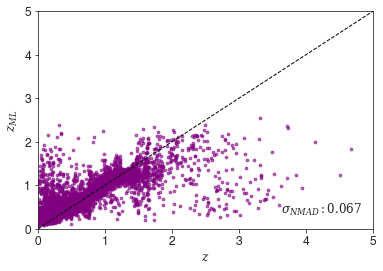

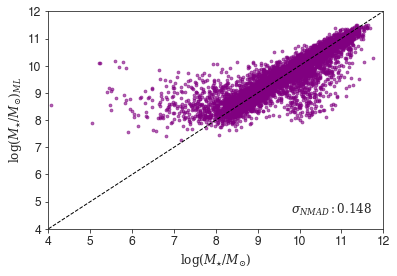

In [11]:
model.plot_scatter(show=True, save=True)

In [ ]:
model.plot_marginal(show=True, save=True)

In [ ]:
model.plot_joint(show=True, save=True)

In [ ]:
model.plot_corner(show=True, save=True)

Creating PIT plots...


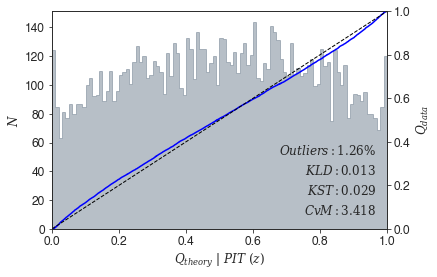

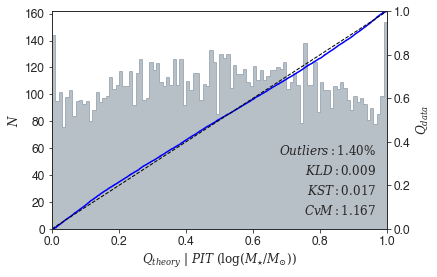

In [12]:
model.plot_pit(show=True, save=True)

Creating marginal calibration plots...


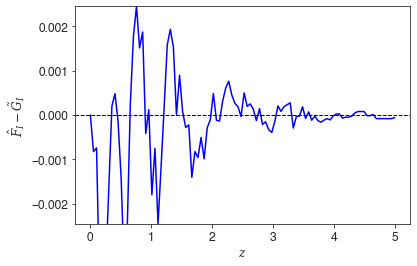

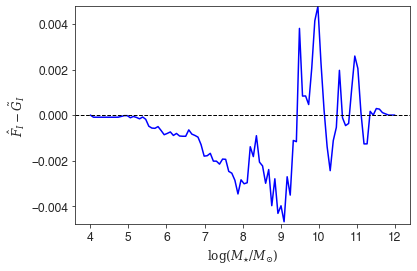

In [13]:
model.plot_marginal_calibration(show=True, save=True)

Creating copPIT plots...


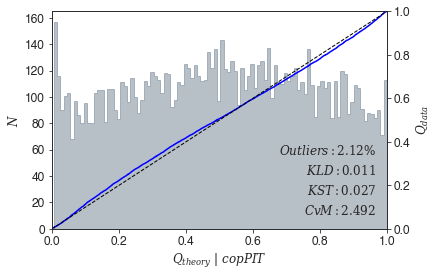

In [14]:
model.plot_coppit(show=True, save=True)

Creating kendall calibration plots...


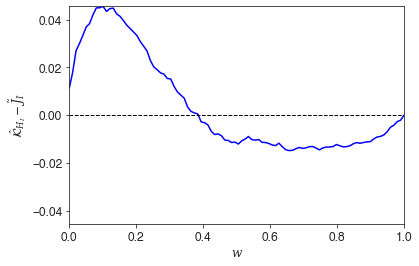

In [15]:
model.plot_kendall_calibration(show=True, save=True)